<a href="https://colab.research.google.com/github/ankit351104/amazon-reviews-sentiment-analyzer/blob/main/sentiment_analyzer_6_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MOUNT THE GDRIVE**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**DATA** **CLASS**

In [ ]:
import random

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()

    def get_sentiment(self):
        if self.score <= 2:
            return "NEGATIVE"
        elif self.score == 3:
            return "NEUTRAL"
        else: #Score of 4 or 5
            return "POSITIVE"

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews

    def get_text(self):
        return [x.text for x in self.reviews]

    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]

    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == "NEGATIVE", self.reviews))
        positive = list(filter(lambda x: x.sentiment == "POSITIVE", self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)

**LOADING THE DATA FROM GDRIVE AND SIMPLIFYING IT**

In [ ]:
import pandas as pd
df = pd.read_json('/content/gdrive/My Drive/Datasets/Books_subset3.json', lines=True)
print(df.head())

review = [Review(x, y) for x, y in zip(df['review_body'], df['star_rating'])]
print('Text: ',review[9].text)
print('Score: ' ,review[9].score)
print('Sentiment: ' ,review[9].sentiment)

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     12076615   RQ58W7SMO911M  0385730586       122662979   
1          US     12703090    RF6IUKMGL8SF  0811828964        56191234   
2          US     12257412  R1DOSHH6AI622S  1844161560       253182049   
3          US     50732546   RATOTLA3OF70O  0373836635       348672532   
4          US     51964897  R1TNWRKIVHVYOV  0262181533       598678717   

                                       product_title product_category  \
0         Sisterhood of the Traveling Pants (Book 1)            Books   
1      The Bad Girl's Guide to Getting What You Want            Books   
2             Eisenhorn (A Warhammer 40,000 Omnibus)            Books   
3                    Colby Conspiracy (Colby Agency)            Books   
4  The Psychology of Proof: Deductive Reasoning i...            Books   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            4              2            3    N

**PREPARING THE DATA**

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(review,test_size=0.25,random_state=42)

train_container = ReviewContainer(train)

test_container = ReviewContainer(test)

In [ ]:
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count("POSITIVE"))
print(train_y.count("NEGATIVE"))

4510
4510


**VECTORIZATION**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[3])
print(train_x_vectors[3].toarray())

"I agree with Jon Pike and C. Thomas below (other reviewers).  I certainly agree that someone needs to end the farce that Virginia Woolf is a good writer.  Her work, to me, is neither thought-provoking nor well-written.  I was really disappointed with this \\""work\\"" and actually threw my copy into a box headed for Goodwill (not really good will to pass it on, but I had to get it out of my house)...and I never give away books.  Let's stop pretending folks..."
[[0. 0. 0. ... 0. 0. 0.]]


**TRAINING THE MODEL**

**LINEAR SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

SVC(kernel='linear')

In [ ]:
print(test_x[3])
clf_svm.predict(test_x_vectors[3])

"John Culberson gets lost in grinding his own ax of complaints about everything from the lack of government support of the war, (for which he is DRT, dead right there), to the political pork barrel that resulted in the much inferior M-16 replacing the venerable M-14, (again a valid point). But he spends far too much time repeating military jargon, repetitiously identifying every spot on the Viet Nam map, and using the book as a forum to name countless comrades who fought with him in Nam. The recurring names do nothing for the story except serve to detract. And the cruelest cut of all may be indicative of his poor research when, on page 166, he disparagingly refers to a vist to the troops by Jane Mansfield and describes her as \\""an aging American icon..who had to be in her late forties or early fifties at the time.\\"" For your unfortunate information, Mr. Culbertson, Jane Mansfield died in 1967 at the ripe old age of 34 years, 2 months and 10 days, hardly what I would call an \\""agi

array(['NEGATIVE'], dtype='<U8')

**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)
print(test_x[4])
clf_gnb.predict(test_x_vectors[0].toarray())

I've been working in the IT field for 20 years, there are too many wrong answers in this book!  In some cases the explanation for the answer shows that the editor or writer told you the wrong answer.  How can you study and be sure you are getting the right answers for the upcoming tests?  Don't get this.


array(['NEGATIVE'], dtype='<U8')

**ACCURACY OF LINEAR SVM**

In [ ]:
print("SVM Accuracy:",clf_svm.score(test_x_vectors, test_y))

SVM Accuracy: 0.8605351170568561


**ACCURACY OF NAIVE BAYES**

In [ ]:
print("Naive Bayes Accuracy:",clf_gnb.score(test_x_vectors.toarray(), test_y))


Naive Bayes Accuracy: 0.6107023411371237


In [ ]:
pip install jsonlines


**TESTING THE MODEL ON DIFFERENT DOMAIN DATA (TRAINED ON BOOKS REVIEWS DATASETS AND TESTED ON KITCHEN DATASET)**

In [ ]:
import jsonlines
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_set = []

json_file_path = '/content/gdrive/My Drive/Datasets/Kitchen Dataset_subset3.json'
with jsonlines.open(json_file_path) as reader:
    for item in reader:
        if 'review_body' in item and item['review_body']:
            test_set.append(item['review_body'])
        else:
            print("Warning: Missing or empty 'review_body' in JSON data.")

new_test = vectorizer.transform(test_set)

predictions = clf_svm.predict(new_test)

for review, prediction in zip(test_set, predictions):
    print(f"Review: {review}\nPredicted Sentiment: {prediction}\n")


Streaming output truncated to the last 5000 lines.
Review: Delicious, not salty, very tasty and filling!<br />Hard to find in stores ... the Product is new, Good price, Perfect packaging, Perfect delivery ... Very Happy ... Thank You!
Predicted Sentiment: POSITIVE

Review: This tea is organic, which is important, and has a really good flavor.  I read some where that Hibiscus has the most antioxidants of any tea.
Predicted Sentiment: POSITIVE

Review: These are advertised as the real Atomic Fireball but they are nowhere near as hot, nor does the flavor last anywhere near as long as the first container I bought from another Amazon seller. Really disappointed.
Predicted Sentiment: NEGATIVE

Review: Love it.  It is everything I was expecting.
Predicted Sentiment: POSITIVE

Review: It's delicious and I love it! I was looking to repurchase peppermint tea when I read reviews saying that spearmint tea was better for hirsutism. it's smooth and I don't add anything but hot water and let it sit f

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Review: Very good rice.
Predicted Sentiment: POSITIVE

Review: Fantastic masala spice mixture, excellent when used so far. Glad to get it here, since I have no access to asian stores within 2 hours.
Predicted Sentiment: POSITIVE

Review: Worst pepitas I've ever had!  Either they didn't roast them right or the are stale...covered with a green powder/flavoring.  Even after sifting off the powder, they still couldn't be saved.
Predicted Sentiment: NEGATIVE

Review: I have bought these wine mixes for the last couple of years at a Winery in Pigeon Forge, TN. I'm not Able to get there as often as in the past, so I was excited to find them on Amazon.  Received them in two days and have served them to friends who ordered right away.  It is so refreshing. The only suggestion I have would be to change the packaging to something like a ziplock closure. After freezing it is really difficult to squeeze the wine slush from the small opening. It woul

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Predicted Sentiment: POSITIVE

Review: Good oil, good packaging, overpriced.
Predicted Sentiment: NEGATIVE

Review: THE INGREDIENTS LISTED ARE 59% COCONUT AND RICE SYRUP. AND IT  IS VERY VERY GOOD.!
Predicted Sentiment: POSITIVE

Review: my pocky came in 10 days earlier then expected date.. shipping packaging was crushed a little. carrier must not of cared how they handled it. due the the heat the pocky was stuck together but i expected that. im very pleased with my order.. i wanted to try out the green tea which i thought id like but turns out i didn't. over all im pleased with the contents of my order. i added a pic. the box of green tea pocky is opened because i tried it before taking a pic..
Predicted Sentiment: NEGATIVE

Review: Not the great buttery taste of the Mayhaw jelly I grew up on in Louisiana, maybe it's the addition of raspberry for the color? This is still very good jelly!
Predicted Sentiment: POSITIVE

Review: I love n

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**F1 SCORE OF SVM**

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=["POSITIVE", "NEGATIVE"])
print("F1 Score:")
print(f"F1 score for POSITIVE class: {f1[0]}")
print(f"F1 score for NEGATIVE class: {f1[1]}")

F1 Score:
F1 score for POSITIVE class: 0.8592592592592593
F1 score for NEGATIVE class: 0.8611295681063122


**F1 SCORE OF NAIVE BAYES**

In [ ]:
from sklearn.metrics import f1_score
predictions = clf_gnb.predict(test_x_vectors.toarray())
f1 = f1_score(test_y, predictions, average=None, labels=["POSITIVE", "NEGATIVE"])
print("F1 Score:")
print(f"F1 score for POSITIVE class: {f1[0]}")
print(f"F1 score for NEGATIVE class: {f1[1]}")

F1 Score:
F1 score for POSITIVE class: 0.6242737249838606
F1 score for NEGATIVE class: 0.596113809854268


**PRECISION**

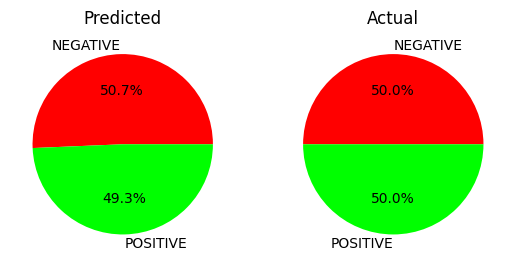

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

x=list(clf_svm.predict(test_x_vectors))

a1=(list(Counter(x).keys())) # unique values
a2=(list(Counter(x).values())) # counts the elements' frequency

plt.subplot(1,2,1)
plt.title("Predicted")
plt.pie(a2,labels=a1,autopct='%1.1f%%',colors=['red','lime'])

b1=(list(Counter(test_y).keys()))
b2=(list(Counter(test_y).values()))

plt.subplot(1,2,2)
plt.title("Actual")
plt.pie(b2,labels=b1,autopct='%1.1f%%',colors=['red','lime'])

plt.show()

**GRAPH**

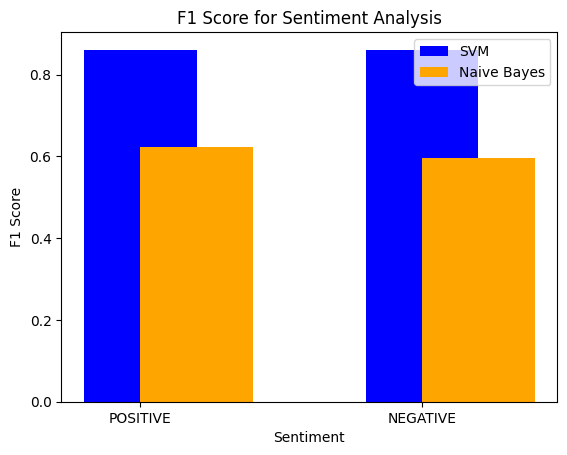

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# SVM
clf_svm = SVC()
clf_svm.fit(train_x_vectors, train_y)
svm_predictions = clf_svm.predict(test_x_vectors)
svm_f1 = f1_score(test_y, svm_predictions, average=None, labels=["POSITIVE", "NEGATIVE"])

# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)
gnb_predictions = clf_gnb.predict(test_x_vectors.toarray())
gnb_f1 = f1_score(test_y, gnb_predictions, average=None, labels=["POSITIVE", "NEGATIVE"])

# Plotting
labels = ["POSITIVE", "NEGATIVE"]
svm_bar = plt.bar(labels, svm_f1, color='blue', width=0.4, label='SVM')
gnb_bar = plt.bar(labels, gnb_f1, color='orange', width=0.4, label='Naive Bayes', align='edge')

plt.xlabel('Sentiment')
plt.ylabel('F1 Score')
plt.title('F1 Score for Sentiment Analysis')
plt.legend()
plt.show()


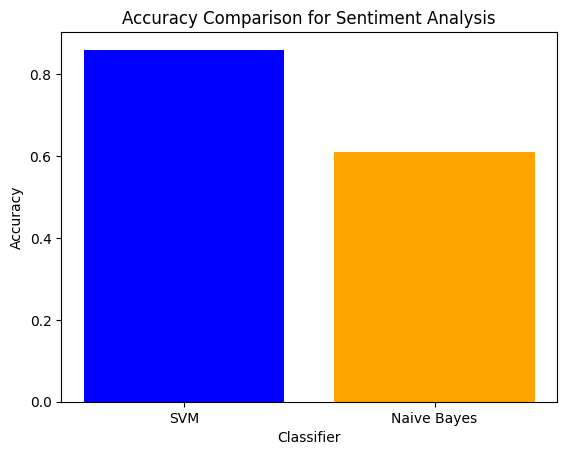

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Assuming you have already trained classifiers and have test data
# SVM
clf_svm = SVC()
clf_svm.fit(train_x_vectors, train_y)
svm_predictions = clf_svm.predict(test_x_vectors)
svm_accuracy = accuracy_score(test_y, svm_predictions)


# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)
gnb_predictions = clf_gnb.predict(test_x_vectors.toarray())
gnb_accuracy = accuracy_score(test_y, gnb_predictions)

# Plotting
labels = ["SVM", "Naive Bayes"]
accuracies = [svm_accuracy, gnb_accuracy]

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Sentiment Analysis')
plt.show()


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

In [ ]:
print("Decision Tree Accuracy:",clf_dec.score(test_x_vectors, test_y))

Decision Tree Accuracy: 0.67123745819398


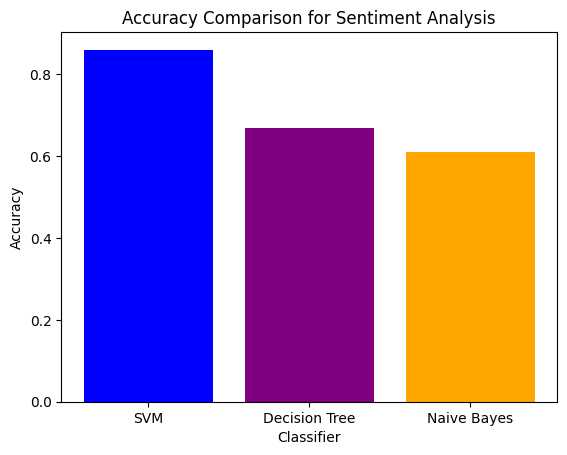

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Assuming you have already trained classifiers and have test data
# SVM
clf_svm = SVC()
clf_svm.fit(train_x_vectors, train_y)
svm_predictions = clf_svm.predict(test_x_vectors)
svm_accuracy = accuracy_score(test_y, svm_predictions)

#Decision Tree
clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)
dec_predictions = clf_dec.predict(test_x_vectors)
dec_accuracy = accuracy_score(test_y, dec_predictions)

# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)
gnb_predictions = clf_gnb.predict(test_x_vectors.toarray())
gnb_accuracy = accuracy_score(test_y, gnb_predictions)

# Plotting
labels = ["SVM", "Decision Tree", "Naive Bayes"]
accuracies = [svm_accuracy, dec_accuracy, gnb_accuracy]

plt.bar(labels, accuracies, color=['blue', 'purple','orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Sentiment Analysis')
plt.show()


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(train_x_vectors, train_y)

rf_predictions = clf_rf.predict(test_x_vectors)

Random Forest Prediction: NEGATIVE


In [ ]:
print("Random Forest Accuracy:",clf_rf.score(test_x_vectors, test_y))

Random Forest Accuracy: 0.8150501672240803


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(train_x_vectors, train_y)
lr_predictions = clf_lr.predict(test_x_vectors)

Logistic Regression Prediction: NEGATIVE


In [ ]:
print("Logistic Regression:",clf_lr.score(test_x_vectors, test_y))

Logistic Regression: 0.8558528428093646


**EXTRA TREES**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf_extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf_extra_trees.fit(train_x_vectors, train_y)

extra_trees_predictions = clf_extra_trees.predict(test_x_vectors)

Extra Trees Prediction: NEGATIVE


In [ ]:
print("Extra Trees Accuracy:",clf_extra_trees.score(test_x_vectors, test_y))

Extra Trees Accuracy: 0.8351170568561873


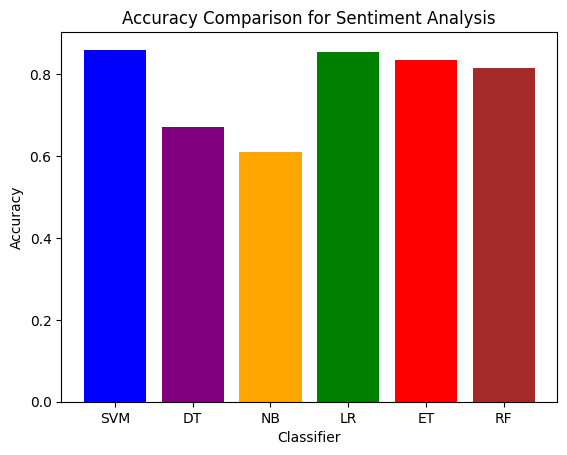

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

# Assuming you have already trained classifiers and have test data
# SVM
clf_svm = SVC()
clf_svm.fit(train_x_vectors, train_y)
svm_predictions = clf_svm.predict(test_x_vectors)
svm_accuracy = accuracy_score(test_y, svm_predictions)

# Decision Tree
clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)
dec_predictions = clf_dec.predict(test_x_vectors)
dec_accuracy = accuracy_score(test_y, dec_predictions)

# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)
gnb_predictions = clf_gnb.predict(test_x_vectors.toarray())
gnb_accuracy = accuracy_score(test_y, gnb_predictions)

# Logistic Regression
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(train_x_vectors, train_y)
lr_predictions = clf_lr.predict(test_x_vectors)
lr_accuracy = accuracy_score(test_y, lr_predictions)

# Extra Trees
clf_extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf_extra_trees.fit(train_x_vectors, train_y)
extra_trees_predictions = clf_extra_trees.predict(test_x_vectors)
extra_trees_accuracy = accuracy_score(test_y, extra_trees_predictions)

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(train_x_vectors, train_y)
rf_predictions = clf_rf.predict(test_x_vectors)
rf_accuracy = accuracy_score(test_y, rf_predictions)

# Plotting
labels = ["SVM", "DT", "NB", "LR", "ET", "RF"]
accuracies = [svm_accuracy, dec_accuracy, gnb_accuracy, lr_accuracy, extra_trees_accuracy, rf_accuracy]

plt.bar(labels, accuracies, color=['blue', 'purple', 'orange', 'green', 'red', 'brown'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Sentiment Analysis')
plt.show()


In [ ]:
from sklearn.metrics import f1_score
predictions = clf_dec.predict(test_x_vectors.toarray())
f1 = f1_score(test_y, predictions, average=None, labels=["POSITIVE", "NEGATIVE"])
print("F1 Score of Decision Tree:")
print(f"F1 score for POSITIVE class: {f1[0]}")
print(f"F1 score for NEGATIVE class: {f1[1]}")

F1 Score of Decision Tree:
F1 score for POSITIVE class: 0.6709072648141949
F1 score for NEGATIVE class: 0.6715669896424992


In [ ]:
from sklearn.metrics import f1_score
predictions = clf_svm.predict(test_x_vectors.toarray())
f1 = f1_score(test_y, predictions, average=None, labels=["POSITIVE", "NEGATIVE"])
print("F1 Score of SVM:")
print(f"F1 score for POSITIVE class: {f1[0]}")
print(f"F1 score for NEGATIVE class: {f1[1]}")

F1 Score of SVM:
F1 score for POSITIVE class: 0.8600201409869084
F1 score for NEGATIVE class: 0.8610463178940354


In [ ]:
from sklearn.metrics import f1_score
predictions = clf_gnb.predict(test_x_vectors.toarray())
f1 = f1_score(test_y, predictions, average=None, labels=["POSITIVE", "NEGATIVE"])
print("F1 Score of Naive Bayes:")
print(f"F1 score for POSITIVE class: {f1[0]}")
print(f"F1 score for NEGATIVE class: {f1[1]}")

F1 Score of Naive Bayes:
F1 score for POSITIVE class: 0.6242737249838606
F1 score for NEGATIVE class: 0.596113809854268


In [ ]:
from sklearn.metrics import f1_score
predictions = clf_lr.predict(test_x_vectors.toarray())
f1 = f1_score(test_y, predictions, average=None, labels=["POSITIVE", "NEGATIVE"])
print("F1 Score of Logistic Regression:")
print(f"F1 score for POSITIVE class: {f1[0]}")
print(f"F1 score for NEGATIVE class: {f1[1]}")

F1 Score of Logistic Regression:
F1 score for POSITIVE class: 0.8550285906491759
F1 score for NEGATIVE class: 0.8566677751912206


In [ ]:
from sklearn.metrics import f1_score
predictions = clf_extra_trees.predict(test_x_vectors.toarray())
f1 = f1_score(test_y, predictions, average=None, labels=["POSITIVE", "NEGATIVE"])
print("F1 Score of Extra Trees:")
print(f"F1 score for POSITIVE class: {f1[0]}")
print(f"F1 score for NEGATIVE class: {f1[1]}")

F1 Score of Extra Trees:
F1 score for POSITIVE class: 0.824617573817147
F1 score for NEGATIVE class: 0.8444304196907542


In [ ]:
from sklearn.metrics import f1_score
predictions = clf_rf.predict(test_x_vectors.toarray())
f1 = f1_score(test_y, predictions, average=None, labels=["POSITIVE", "NEGATIVE"])
print("F1 Score of Random Forest:")
print(f"F1 score for POSITIVE class: {f1[0]}")
print(f"F1 score for NEGATIVE class: {f1[1]}")

F1 Score of Random Forest:
F1 score for POSITIVE class: 0.8054871614491734
F1 score for NEGATIVE class: 0.8237169270003187


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

# SVM
clf_svm = SVC()
clf_svm.fit(train_x_vectors, train_y)
svm_predictions = clf_svm.predict(test_x_vectors)
svm_accuracy = accuracy_score(test_y, svm_predictions)

# Decision Tree
clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)
dec_predictions = clf_dec.predict(test_x_vectors)
dec_accuracy = accuracy_score(test_y, dec_predictions)

# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)
gnb_predictions = clf_gnb.predict(test_x_vectors.toarray())
gnb_accuracy = accuracy_score(test_y, gnb_predictions)

# Logistic Regression
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(train_x_vectors, train_y)
lr_predictions = clf_lr.predict(test_x_vectors)
lr_accuracy = accuracy_score(test_y, lr_predictions)

# Extra Trees
clf_extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf_extra_trees.fit(train_x_vectors, train_y)
extra_trees_predictions = clf_extra_trees.predict(test_x_vectors)
extra_trees_accuracy = accuracy_score(test_y, extra_trees_predictions)

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(train_x_vectors, train_y)
rf_predictions = clf_rf.predict(test_x_vectors)
rf_accuracy = accuracy_score(test_y, rf_predictions)

# Create a DataFrame for comparison
data = {
    "Classifier": ["SVM", "Decision Tree", "Naive Bayes", "Logistic Regression", "Extra Trees", "Random Forest"],
    "Accuracy": [svm_accuracy, dec_accuracy, gnb_accuracy, lr_accuracy, extra_trees_accuracy, rf_accuracy]
}

comparison_df = pd.DataFrame(data)

# Display the comparison table
print(comparison_df)


            Classifier  Accuracy
0                  SVM  0.860535
1        Decision Tree  0.667893
2          Naive Bayes  0.610702
3  Logistic Regression  0.855853
4          Extra Trees  0.835117
5        Random Forest  0.815050


In [ ]:
# SVM
clf_svm = SVC()
clf_svm.fit(train_x_vectors, train_y)
svm_predictions = clf_svm.predict(test_x_vectors)
svm_accuracy = accuracy_score(test_y, svm_predictions)
svm_precision = precision_score(test_y, svm_predictions, pos_label='POSITIVE')
svm_recall = recall_score(test_y, svm_predictions, pos_label='POSITIVE')
svm_f1 = f1_score(test_y, svm_predictions, pos_label='POSITIVE')

# Decision Tree
clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)
dec_predictions = clf_dec.predict(test_x_vectors)
dec_accuracy = accuracy_score(test_y, dec_predictions)
dec_precision = precision_score(test_y, dec_predictions, pos_label='POSITIVE')
dec_recall = recall_score(test_y, dec_predictions, pos_label='POSITIVE')
dec_f1 = f1_score(test_y, dec_predictions, pos_label='POSITIVE')

# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)
gnb_predictions = clf_gnb.predict(test_x_vectors.toarray())
gnb_accuracy = accuracy_score(test_y, gnb_predictions)
gnb_precision = precision_score(test_y, gnb_predictions, pos_label='POSITIVE')
gnb_recall = recall_score(test_y, gnb_predictions, pos_label='POSITIVE')
gnb_f1 = f1_score(test_y, gnb_predictions, pos_label='POSITIVE')

# Logistic Regression
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(train_x_vectors, train_y)
lr_predictions = clf_lr.predict(test_x_vectors)
lr_accuracy = accuracy_score(test_y, lr_predictions)
lr_precision = precision_score(test_y, lr_predictions, pos_label='POSITIVE')
lr_recall = recall_score(test_y, lr_predictions, pos_label='POSITIVE')
lr_f1 = f1_score(test_y, lr_predictions, pos_label='POSITIVE')

# Extra Trees
clf_extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf_extra_trees.fit(train_x_vectors, train_y)
extra_trees_predictions = clf_extra_trees.predict(test_x_vectors)
extra_trees_accuracy = accuracy_score(test_y, extra_trees_predictions)
extra_trees_precision = precision_score(test_y, extra_trees_predictions, pos_label='POSITIVE')
extra_trees_recall = recall_score(test_y, extra_trees_predictions, pos_label='POSITIVE')
extra_trees_f1 = f1_score(test_y, extra_trees_predictions, pos_label='POSITIVE')

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(train_x_vectors, train_y)
rf_predictions = clf_rf.predict(test_x_vectors)
rf_accuracy = accuracy_score(test_y, rf_predictions)
rf_precision = precision_score(test_y, rf_predictions, pos_label='POSITIVE')
rf_recall = recall_score(test_y, rf_predictions, pos_label='POSITIVE')
rf_f1 = f1_score(test_y, rf_predictions, pos_label='POSITIVE')

# Create a DataFrame for comparison
data = {
    "Classifier": ["SVM", "Decision Tree", "Naive Bayes", "Logistic Regression", "Extra Trees", "Random Forest"],
    "Accuracy": [svm_accuracy, dec_accuracy, gnb_accuracy, lr_accuracy, extra_trees_accuracy, rf_accuracy],
    "Precision": [svm_precision, dec_precision, gnb_precision, lr_precision, extra_trees_precision, rf_precision],
    "Recall": [svm_recall, dec_recall, gnb_recall, lr_recall, extra_trees_recall, rf_recall],
    "F1 Score": [svm_f1, dec_f1, gnb_f1, lr_f1, extra_trees_f1, rf_f1]
}

comparison_df = pd.DataFrame(data)

# Display the comparison table
print(comparison_df)


            Classifier  Accuracy  Precision    Recall  F1 Score
0                  SVM  0.860535   0.863208  0.856856  0.860020
1        Decision Tree  0.668227   0.666007  0.674916  0.670432
2          Naive Bayes  0.610702   0.603244  0.646823  0.624274
3  Logistic Regression  0.855853   0.859946  0.850167  0.855029
4          Extra Trees  0.835117   0.880699  0.775251  0.824618
5        Random Forest  0.813712   0.847407  0.765217  0.804218


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

json_file_path = '/content/gdrive/My Drive/Datasets/Books_subset3.json'

df = pd.read_json(json_file_path,lines = True)

print("Original Data:")
print(df.head())

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Perform part-of-speech tagging
    pos_tags = pos_tag(words)

    # Stemming using Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word, _ in pos_tags]

    # Join the stemmed words back into a string
    preprocessed_text = ' '.join(stemmed_words)

    return preprocessed_text

df['preprocessed_review'] = df['review_body'].apply(preprocess_text)

print("\nData after Preprocessing:")
print(df[['review_body', 'preprocessed_review']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Data:
  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     12076615   RQ58W7SMO911M  0385730586       122662979   
1          US     12703090    RF6IUKMGL8SF  0811828964        56191234   
2          US     12257412  R1DOSHH6AI622S  1844161560       253182049   
3          US     50732546   RATOTLA3OF70O  0373836635       348672532   
4          US     51964897  R1TNWRKIVHVYOV  0262181533       598678717   

                                       product_title product_category  \
0         Sisterhood of the Traveling Pants (Book 1)            Books   
1      The Bad Girl's Guide to Getting What You Want            Books   
2             Eisenhorn (A Warhammer 40,000 Omnibus)            Books   
3                    Colby Conspiracy (Colby Agency)            Books   
4  The Psychology of Proof: Deductive Reasoning i...            Books   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            4              2   

In [ ]:
import nltk

nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True